<a href="https://colab.research.google.com/github/SuycoR/QUIMICA-G3/blob/main/PC_2_Quimica_UNMSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 36.4 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
PeriodicTable = Chem.GetPeriodicTable()


In [ ]:
elementoslist=[]
nombrelist=[]
masatomiclist=[]
numberatomiclist=[]
valencialist=[]

for i in range(1,21):
    elementoslist.append(PeriodicTable.GetElementSymbol(i))

for x in range(1,21):
    nombrelist.append(PeriodicTable.GetElementName(x))
masatomiclist = [PeriodicTable.GetAtomicWeight(i) for i in elementoslist]
numberatomiclist = [PeriodicTable.GetAtomicNumber(i) for i in elementoslist]
valencialist= [PeriodicTable.GetValenceList(i) for i in elementoslist]


In [ ]:
import pandas as pd
data={'Nombre':nombrelist,'Simbolo':elementoslist,'Numero Atomico':numberatomiclist,'Masa Atomica':masatomiclist,'valencia':valencialist}
cuadradito = pd.DataFrame(data)
cuadradito

,Nombre,Simbolo,Numero Atomico,Masa Atomica,valencia
0,Hydrogen,H,1,1.008,[1]
1,Helium,He,2,4.003,[0]
2,Lithium,Li,3,6.941,"[1, -1]"
3,Beryllium,Be,4,9.012,[2]
4,Boron,B,5,10.812,[3]
5,Carbon,C,6,12.011,[4]
6,Nitrogen,N,7,14.007,[3]
7,Oxygen,O,8,15.999,[2]
8,Fluorine,F,9,18.998,[1]
9,Neon,Ne,10,20.180,[0]


## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [ ]:
#Para este problema se penso en utilizar la funcion GetNouterElecs de la libreria rdikt ,pero un pequeño error de concepto que aun no lo tengo bien claro me declino a usarlo.
PeriodicTable.GetNOuterElecs('Ca')

2

In [ ]:
PeriodicTable.GetNOuterElecs('Co')

9

*Como puede ver el cobalto me arroja 9 electrones de valencia, y asi pasa para los elementos del grupo B, cuando en su configuracion electronica , hablando del cobalto , el nivel mas grande es el 4 el cual posee 2 electrones en esa capa.*
*Aparte para la estructura de Lewis , la representacion de los "puntos" es segun los electrones de Valencia, y en este caso el cobalto en su representacion se ponen 2 "puntos".*

PSDTA:En algunos articulos me indicaban que cuando se trabajaba  con metales de transicion tambien se tomaban en cuenta los subniveles d y f ya que tambien estaban presentes en la formacion de enlaces quimicos e indicaban que ambos electrones de valencia estaban "bien".


*** Debido a esta interrogante se creo un codigo que toma el ingreso de protones del (1 al 118) y te arroja su electrones de valencia de acuerdo a la regla de sarrus ***


In [ ]:
# Número de protones como input
# Completa con tu código
sarrus=[2,2,6,2,6,2,10,6,2,10,6,2,14,10,6,2,14,10,6,]
nivel= [1,2,2,3,3,4, 3,4,5, 4,5,6, 4, 5,6,7, 5, 6,7]
protones=int(input("ingresa numero de protones: "))
ep=protones
nivelstart=1
capaultima_e=0
valencia=0
for c in range(0,len(sarrus)):
    resta=ep-sarrus[c]
    if(resta>0):
        if(nivelstart<nivel[c]):
            nivelstart=nivel[c]
            capaultima_e=0
        if(nivelstart==nivel[c]):
            capaultima_e=capaultima_e+sarrus[c]
        ep=resta #dentro del if, siempre positivo
    elif(resta<=0):    # siempre se llega a esta condicion.
        if(nivelstart>nivel[c]):
            valencia=capaultima_e
            break
        elif(nivelstart<nivel[c]):
            #en teoria nivelstar=nivel[c]
            capaultima_e=0
            valencia=capaultima_e+ep
            break
        else:
            valencia=capaultima_e+ep
            break
print("Cantidad de electrones ubicada en la ultima capa es:",valencia)

ingresa numero de protones: 27
Cantidad de electrones ubicada en la ultima capa es: 2


# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

**Balancea** la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

Se Observa que la reaccion a balancear es :

C4H8 + O2 ----> CO2 + H2O

In [ ]:
!pip install chempy

In [ ]:
from chempy import balance_stoichiometry

In [ ]:
reactantes,productos = balance_stoichiometry ({'C4H8','O2'},{'CO2','H2O'})
print("COEFICIENTES DE LOS REACTANTES:\n",dict(reactantes))
print("COEFICIENTES DE LOS PRODUCTOS:\n",dict(productos))


COEFICIENTES DE LOS REACTANTES:
 {'C4H8': 1, 'O2': 6}
COEFICIENTES DE LOS PRODUCTOS:
 {'CO2': 4, 'H2O': 4}


In [ ]:
import pandas as pd
data={'coef REactantes':dict(reactantes),'Coef Productos':dict(productos)}
cuadradito = pd.DataFrame(data)
cuadradito

,coef REactantes,Coef Productos
C4H8,1,NaN
O2,6,NaN
CO2,NaN,4
H2O,NaN,4


# Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [ ]:
!apt-get -qq install -y openbabel

In [ ]:
!obabel -i smi AVOGADRO.txt -o sdf --gen3D > output.sdf

10 molecules converted


In [ ]:
!grep WARNING output.sdf

In [ ]:
!obabel -i sdf output.sdf -o mol2 -O _.mol2 -h -m

10 molecules converted
10 files output. The first is _1.mol2


In [ ]:
!obabel *.mol2 -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 19470    -1.89890    -1.89886
 19480    -1.89946    -1.89942
 19490    -1.89958    -1.89957
 19500    -1.89967    -1.89966
 19510    -1.89975    -1.89974
 19520    -1.89984    -1.89983
 19530    -1.89993    -1.89992
 19540    -1.90003    -1.90002
 19550    -1.90015    -1.90013
 19560    -1.90029    -1.90027
 19570    -1.90047    -1.90045
 19580    -1.90073    -1.90070
 19590    -1.90115    -1.90110
 19600    -1.90168    -1.90167
 19610    -1.90179    -1.90178
 19620    -1.90192    -1.90191
 19630    -1.90209    -1.90207
 19640    -1.90233    -1.90230
 19650    -1.90271    -1.90266
 19660    -1.90298    -1.90297
 19670    -1.90307    -1.90306
 19680    -1.90317    -1.90316
 19690    -1.90329    -1.90327
 19700    -1.90344    -1.90342
 19710    -1.90363    -1.90361
 19720    -1.90393    -1.90389
 19730    -1.90447    -1.90439
 19740    -1.90468    -1.90467
 19750    -1.90476    -1.90476
 19760    -1.90485    -1.90484
 19

In [ ]:
!obabel -i xyz *.xyz -o pdbqt -O lig_.pdbqt -m

10 molecules converted
10 files output. The first is lig_opt_10.pdbqt


In [ ]:
!ls *xyz | wc -l

10


In [ ]:
!mkdir mis_inputs_vina
!mv *.pdbqt /content/mis_inputs_vina

In [ ]:
!zip mis_inputs_vina.zip /content/mis_inputs_vina/*.pdbqt

  adding: content/mis_inputs_vina/lig_opt_10.pdbqt (deflated 74%)
  adding: content/mis_inputs_vina/lig_opt_1.pdbqt (deflated 73%)
  adding: content/mis_inputs_vina/lig_opt_2.pdbqt (deflated 74%)
  adding: content/mis_inputs_vina/lig_opt_3.pdbqt (deflated 71%)
  adding: content/mis_inputs_vina/lig_opt_4.pdbqt (deflated 75%)
  adding: content/mis_inputs_vina/lig_opt_5.pdbqt (deflated 70%)
  adding: content/mis_inputs_vina/lig_opt_6.pdbqt (deflated 70%)
  adding: content/mis_inputs_vina/lig_opt_7.pdbqt (deflated 75%)
  adding: content/mis_inputs_vina/lig_opt_8.pdbqt (deflated 75%)
  adding: content/mis_inputs_vina/lig_opt_9.pdbqt (deflated 75%)


#ESTRUCUTRA DE LOS FARMACOS EN AVOGADRO

##1.Penicilina CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C
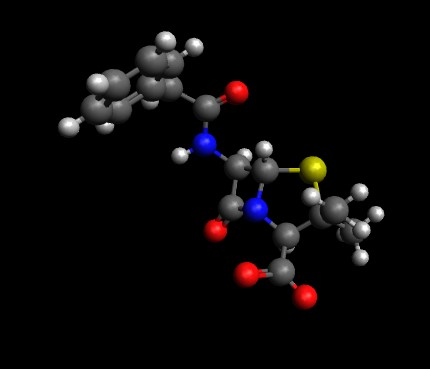
               


##2.Amoxicilina CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C
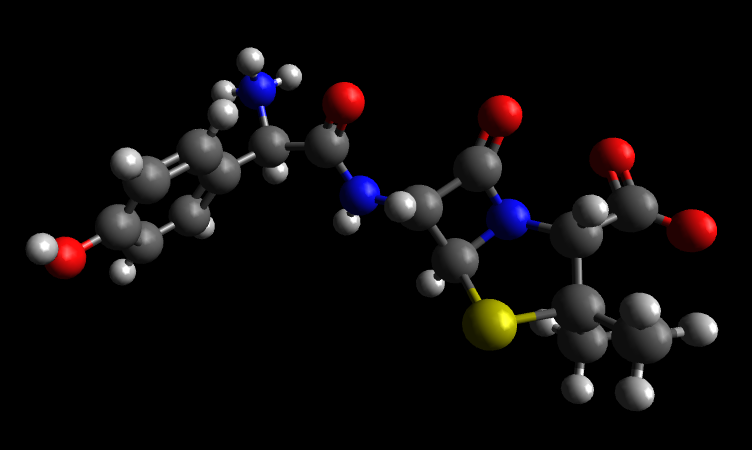

##3.Metanphetamina CC(CC1=CC=CC=C1)NC
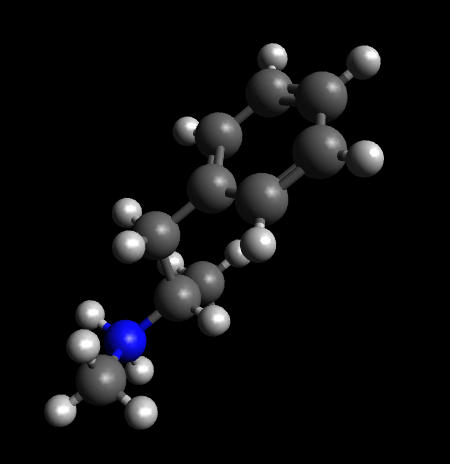


##4.Sildenafil CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C
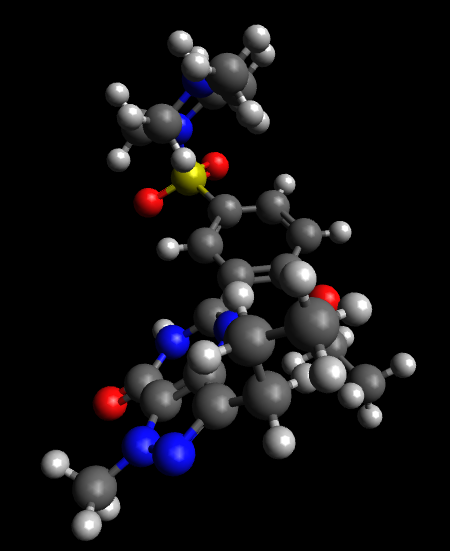

##5.Acetaminophen CC(=O)NC1=CC=C(C=C1)O
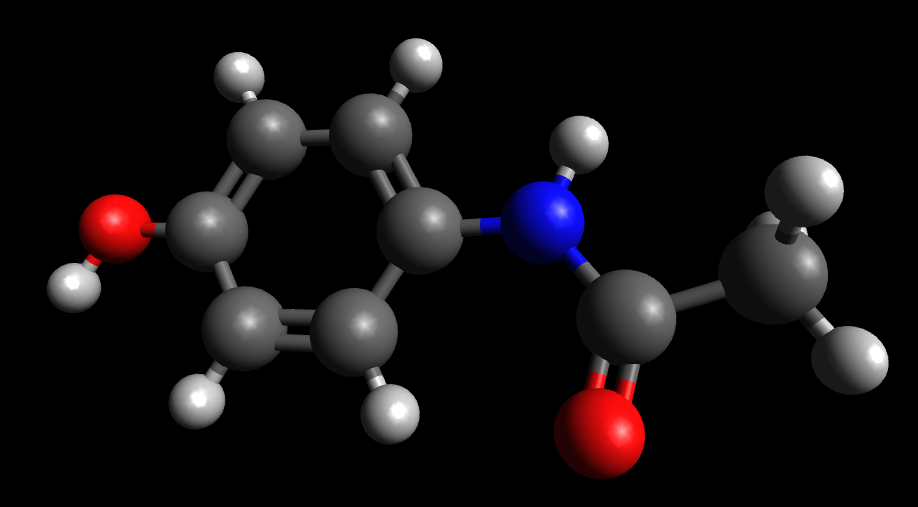

##6.Aspirin CC(=O)OC1=CC=CC=C1C(=O)O
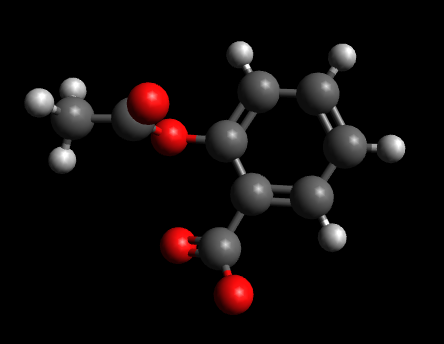

##7.Ramipril CCOC(=O)C(CCC1=CC=CC=C1)NC(C)C(=O)N2C3CCCC3CC2C(=O)O
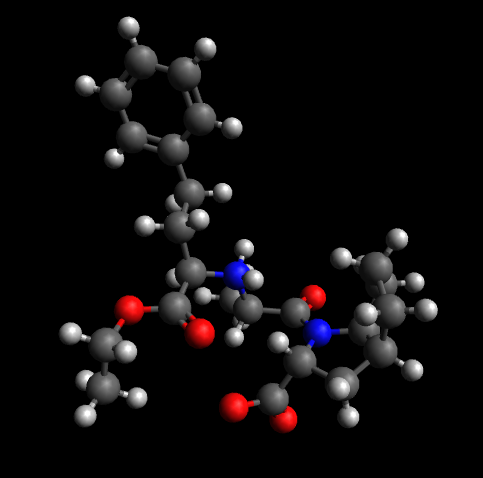

##8.Amlodipine CCOC(=O)C1=C(NC(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)COCCN
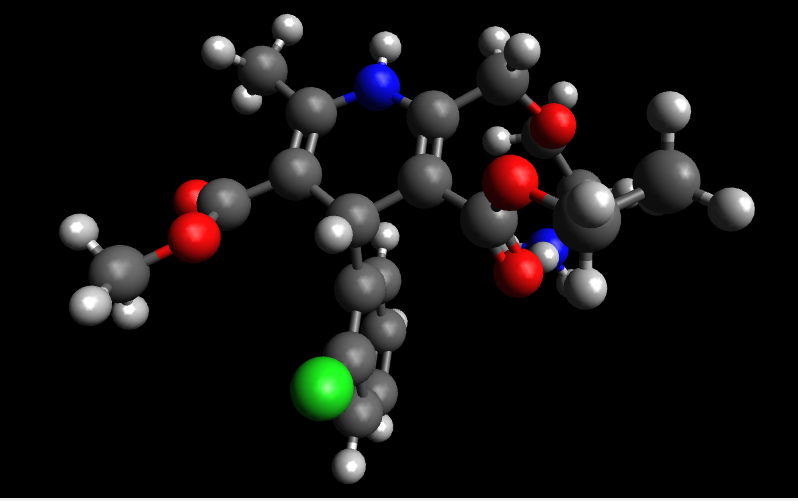

##9.Salbutamol CC(C)(C)NCC(C1=CC(=C(C=C1)O)CO)O
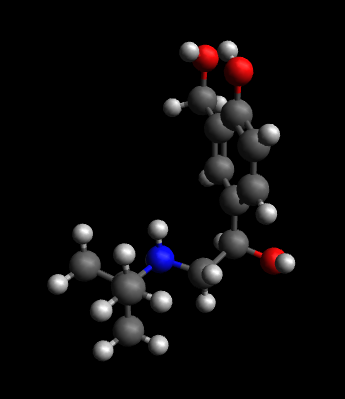

##10.Lansoprazole CC1=C(C=CN=C1CS(=O)C2=NC3=CC=CC=C3N2)OCC(F)(F)F
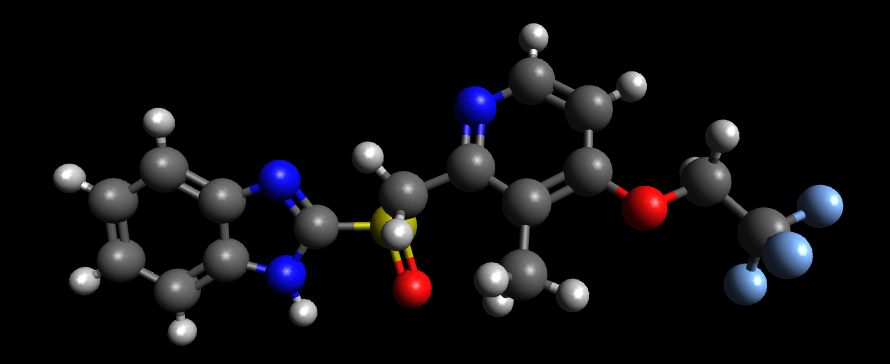

# Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

El método científico como bien se sabe es un enfoque utilizado en trabajos académicos para dar conclusiones a partir de observaciones.
En el artículo se nos presenta una observación, la cual es la dificultad de los alumnos en comprender los fundamentos de la química, específicamente en la comprensión de
la estructura atómica, las propiedades periódicas y la aplicación del principio de Aufbau y el
principio de Hund.
Para esta observación, realizan la revisión de la literatura respecto a ello, encontrándose con que existen modelos que buscan hacer didáctico el entender este principio, sin embargo, los autores del libro no los consideraron adecuados debido a que en un modelo no asignan las cargas de los protones(positivos), electrones(negativos) y neutrones y en la otra su costo de fabricación es alto.
Luego entrarían en la fase de la experimentación, en donde proponen un modelo de bajo costo para explicar el concepto de configuración electrónica utilizando cajas de huevo como base.
Luego pasamos a la fase del método científico llamada “Análisis de resultados” en donde se nos presenta con evidencia y datos que este modelo tuvo éxito en estudiantes de la Corporación
Universitaria Unilasallista con edades que variaban entre los 18 y 22 años.
Conclusiones, en esta última fase, los autores llegan a la conclusión de que su modelo es viable tanto económicamente como didácticamente. Esto se basa en la evidencia recopilada durante la experimentación, que demuestra que el modelo es efectivo para mejorar la comprensión de los estudiantes y que se puede implementar a un costo razonable.
